In [68]:
import numpy as np 
import pandas as pd
import requests
import json

url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000&api_key={cad6d0cdd43e6187dc1b26e8ab29018845c4d04404725c071eb7e9f5a8f8bd55}"
response = requests.get(url)
value = response.json()


In [69]:
data = value['Data']['Data']
df = pd.DataFrame(data)
df = df.drop(columns=['conversionType', 'conversionSymbol',"volumefrom"])
df.rename(columns={"volumeto":"volume"}, inplace=True)
df["target"] = (df['open'] < df['close']).astype(int)

s = pd.to_datetime(df['time'], unit='s').dt.strftime("%d-%m-%Y")
df.drop(['time'], axis=1, inplace=True)
df.insert(0,'time', s)

In [70]:
df

,time,high,low,open,volume,close,target
0,16-02-2018,10303.14,9720.38,10033.75,1.061828e+09,10188.73,1
1,17-02-2018,11119.45,10074.07,10188.73,1.327921e+09,11097.21,1
2,18-02-2018,11288.34,10161.01,11097.21,1.659704e+09,10417.23,0
3,19-02-2018,11265.96,10336.32,10418.12,1.186536e+09,11182.28,1
4,20-02-2018,11802.23,11130.95,11182.28,1.640344e+09,11256.43,1
...,...,...,...,...,...,...,...
1996,05-08-2023,29110.47,28953.37,29078.88,1.200529e+08,29050.34,0
1997,06-08-2023,29164.73,28962.89,29050.34,1.266885e+08,29046.16,0
1998,07-08-2023,29245.24,28671.87,29046.16,4.737760e+08,29182.05,1
1999,08-08-2023,30206.08,29111.53,29182.05,7.867986e+08,29770.63,1


In [3]:
import yfinance as yf
import os
import pandas as pd

In [4]:
btc_ticker = yf.Ticker("BTC-USD")

In [5]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [6]:
btc.index = pd.to_datetime(btc.index)

In [7]:
del btc["Dividends"]
del btc["Stock Splits"]

In [8]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

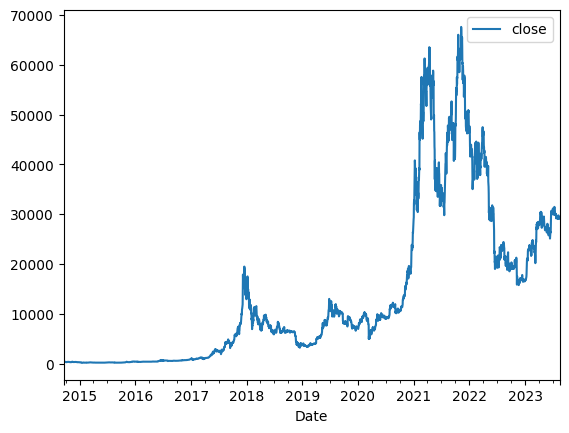

In [9]:
btc.plot.line(y="close", use_index=True)